<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_3_2_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_3.2'

In [4]:
os.listdir(base_path)

['data_add_delta_3.2_n20.csv',
 'data_add_delta_3.2_n30.csv',
 'data_add_delta_3.2_n60.csv',
 'data_add_delta_3.2_n120.csv',
 'data_add_delta_3.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.2_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,41.719242,21.335081,95.253889,2.243522e+03,2.411830e+03,-14154.644366,1.656647e+04
1,0.0,1.0,84.479125,41.265477,75.963418,3.989920e+05,3.992037e+05,-59721.611375,4.589253e+05
2,0.0,2.0,28.646439,27.812977,30.793218,1.291906e+05,1.292878e+05,-285394.091303,4.146819e+05
3,0.0,3.0,76.757397,98.787328,41.004809,1.362344e+06,1.362571e+06,325974.112456,1.036597e+06
4,0.0,4.0,64.747145,43.165017,75.754609,-1.838845e+05,-1.836908e+05,17453.719943,-2.011446e+05
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,66.677829,81.913382,72.146077,-2.289872e+06,-2.289642e+06,291272.428311,-2.580914e+06
119996,999.0,116.0,35.162750,78.053743,38.104555,1.189733e+06,1.189894e+06,487466.588091,7.024278e+05
119997,999.0,117.0,49.770665,55.161472,65.972356,3.613824e+05,3.615633e+05,163063.043963,1.985003e+05
119998,999.0,118.0,73.257335,82.663023,99.280132,8.559969e+04,8.586489e+04,241402.561472,-1.555377e+05


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,41.719242,21.335081,95.253889,2.243522e+03,2.411830e+03,-14154.644366,1.656647e+04
1,0.0,1.0,84.479125,41.265477,75.963418,3.989920e+05,3.992037e+05,-59721.611375,4.589253e+05
2,0.0,2.0,28.646439,27.812977,30.793218,1.291906e+05,1.292878e+05,-285394.091303,4.146819e+05
3,0.0,3.0,76.757397,98.787328,41.004809,1.362344e+06,1.362571e+06,325974.112456,1.036597e+06
4,0.0,4.0,64.747145,43.165017,75.754609,-1.838845e+05,-1.836908e+05,17453.719943,-2.011446e+05
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,66.677829,81.913382,72.146077,-2.289872e+06,-2.289642e+06,291272.428311,-2.580914e+06
119996,999.0,116.0,35.162750,78.053743,38.104555,1.189733e+06,1.189894e+06,487466.588091,7.024278e+05
119997,999.0,117.0,49.770665,55.161472,65.972356,3.613824e+05,3.615633e+05,163063.043963,1.985003e+05
119998,999.0,118.0,73.257335,82.663023,99.280132,8.559969e+04,8.586489e+04,241402.561472,-1.555377e+05


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...          y_hat         e_hat
rep   index                        ...                             
0.0   0.0    41.719242  21.335081  ...  -14154.644366  1.656647e+04
      1.0    84.479125  41.265477  ...  -59721.611375  4.589253e+05
      2.0    28.646439  27.812977  ... -285394.091303  4.146819e+05
      3.0    76.757397  98.787328  ...  325974.112456  1.036597e+06
      4.0    64.747145  43.165017  ...   17453.719943 -2.011446e+05
...                ...        ...  ...            ...           ...
999.0 115.0  66.677829  81.913382  ...  291272.428311 -2.580914e+06
      116.0  35.162750  78.053743  ...  487466.588091  7.024278e+05
      117.0  49.770665  55.161472  ...  163063.043963  1.985003e+05
      118.0  73.257335  82.663023  ...  241402.561472 -1.555377e+05
      119.0  83.730610  78.506993  ...  130445.746752  8.519194e+04

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...          y_hat         e_hat
rep   index                        ...                             
0.0   0.0    41.719242  21.335081  ...  -14154.644366  1.656647e+04
      1.0    84.479125  41.265477  ...  -59721.611375  4.589253e+05
      2.0    28.646439  27.812977  ... -285394.091303  4.146819e+05
      3.0    76.757397  98.787328  ...  325974.112456  1.036597e+06
      4.0    64.747145  43.165017  ...   17453.719943 -2.011446e+05
...                ...        ...  ...            ...           ...
999.0 115.0  66.677829  81.913382  ...  291272.428311 -2.580914e+06
      116.0  35.162750  78.053743  ...  487466.588091  7.024278e+05
      117.0  49.770665  55.161472  ...  163063.043963  1.985003e+05
      118.0  73.257335  82.663023  ...  241402.561472 -1.555377e+05
      119.0  83.730610  78.506993  ...  130445.746752  8.519194e+04

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,41.719242,21.335081,95.253889,2.243522e+03,2.411830e+03,-14154.644366,1.656647e+04
1,0.0,1.0,84.479125,41.265477,75.963418,3.989920e+05,3.992037e+05,-59721.611375,4.589253e+05
2,0.0,2.0,28.646439,27.812977,30.793218,1.291906e+05,1.292878e+05,-285394.091303,4.146819e+05
3,0.0,3.0,76.757397,98.787328,41.004809,1.362344e+06,1.362571e+06,325974.112456,1.036597e+06
4,0.0,4.0,64.747145,43.165017,75.754609,-1.838845e+05,-1.836908e+05,17453.719943,-2.011446e+05
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,66.677829,81.913382,72.146077,-2.289872e+06,-2.289642e+06,291272.428311,-2.580914e+06
119996,999.0,116.0,35.162750,78.053743,38.104555,1.189733e+06,1.189894e+06,487466.588091,7.024278e+05
119997,999.0,117.0,49.770665,55.161472,65.972356,3.613824e+05,3.615633e+05,163063.043963,1.985003e+05
119998,999.0,118.0,73.257335,82.663023,99.280132,8.559969e+04,8.586489e+04,241402.561472,-1.555377e+05


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...          y_hat         e_hat
rep   index                        ...                             
0.0   0.0    41.719242  21.335081  ...  -14154.644366  1.656647e+04
      1.0    84.479125  41.265477  ...  -59721.611375  4.589253e+05
      2.0    28.646439  27.812977  ... -285394.091303  4.146819e+05
      3.0    76.757397  98.787328  ...  325974.112456  1.036597e+06
      4.0    64.747145  43.165017  ...   17453.719943 -2.011446e+05
...                ...        ...  ...            ...           ...
999.0 115.0  66.677829  81.913382  ...  291272.428311 -2.580914e+06
      116.0  35.162750  78.053743  ...  487466.588091  7.024278e+05
      117.0  49.770665  55.161472  ...  163063.043963  1.985003e+05
      118.0  73.257335  82.663023  ...  241402.561472 -1.555377e+05
      119.0  83.730610  78.506993  ...  130445.746752  8.519194e+04

[120000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

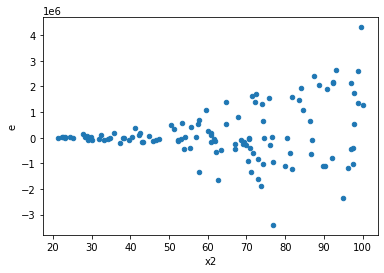

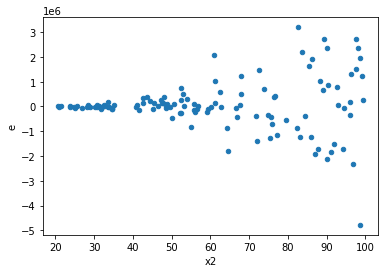

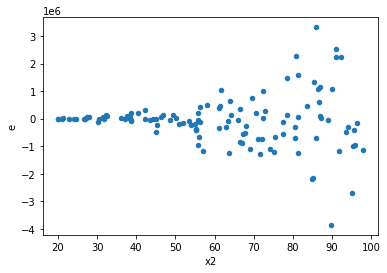

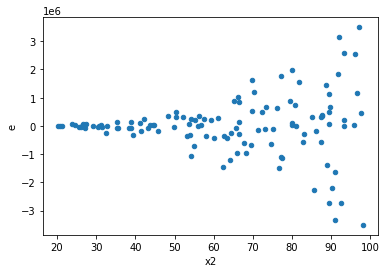

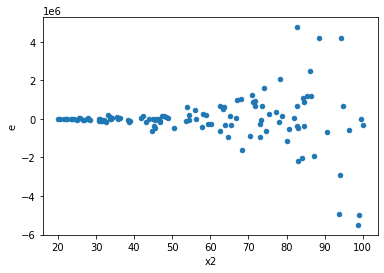

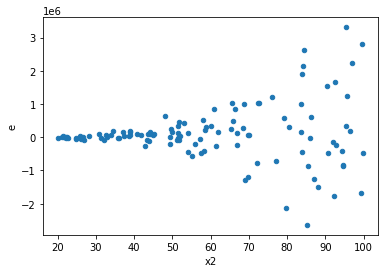

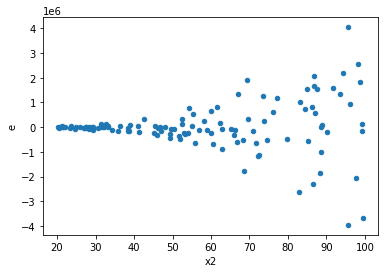

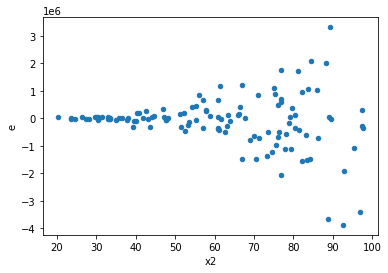

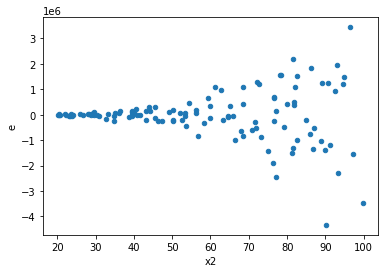

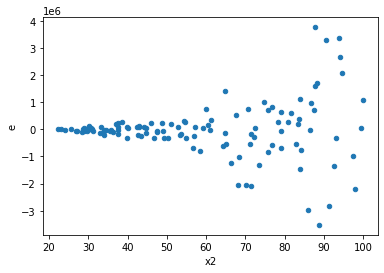

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,45.0,45.0,100787832150414.47,4209577284316.3203,2290632548873.056,95672211007.1891,23.942506656409677,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
1.0,45.0,45.0,108239490162129.2,902057178098.758,2459988412775.6636,20501299502.244503,119.99182844513548,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
2.0,45.0,45.0,88454159979495.94,943638422716.508,2010321817715.8167,21446327789.011547,93.737344569817,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
3.0,45.0,45.0,108460879202754.38,3010886170266.6367,2465019981880.7812,68429231142.42356,36.0229092264718,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
4.0,45.0,45.0,171658336878561.75,748865765491.4119,3901325838149.131,17019676488.44118,229.224441533815,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
5.0,45.0,45.0,75272385795730.78,699686386942.5874,1710736040812.0632,15901963339.60426,107.58017763450819,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
6.0,45.0,45.0,113482176168257.22,441910064602.85516,2579140367460.391,10043410559.1558,256.7992568131339,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
7.0,45.0,45.0,92402892541643.0,1201461606955.7224,2100065739582.7954,27305945612.630054,76.9087351661403,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
8.0,45.0,45.0,109792183007036.14,644180905026.9601,2495276886523.549,14640475114.249092,170.43687906651184,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,100787832150414.47,4209577284316.3203,2290632548873.056,95672211007.1891,23.942506656409677,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
1.0,45.0,45.0,108239490162129.2,902057178098.758,2459988412775.6636,20501299502.244503,119.99182844513548,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
2.0,45.0,45.0,88454159979495.94,943638422716.508,2010321817715.8167,21446327789.011547,93.737344569817,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
3.0,45.0,45.0,108460879202754.38,3010886170266.6367,2465019981880.7812,68429231142.42356,36.0229092264718,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
4.0,45.0,45.0,171658336878561.75,748865765491.4119,3901325838149.131,17019676488.44118,229.224441533815,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
5.0,45.0,45.0,75272385795730.78,699686386942.5874,1710736040812.0632,15901963339.60426,107.58017763450819,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
6.0,45.0,45.0,113482176168257.22,441910064602.85516,2579140367460.391,10043410559.1558,256.7992568131339,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
7.0,45.0,45.0,92402892541643.0,1201461606955.7224,2100065739582.7954,27305945612.630054,76.9087351661403,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
8.0,45.0,45.0,109792183007036.14,644180905026.9601,2495276886523.549,14640475114.249092,170.43687906651184,2.220446049250313e-16,Reject005=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64